# Bayesian Network

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Introduction" role="tab" aria-controls="profile">Introduction<span class="badge badge-primary badge-pill"></span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Bayesian-Time-Series" role="tab" aria-controls="messages">Bayesian Time Series<span class="badge badge-primary badge-pill"></span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#Bayesian-Belief-Network" role="tab" aria-controls="settings">Bayesian Belief Network<span class="badge badge-primary badge-pill"></span></a>
    </div>

# Introduction

Bayesian networks are a type of probabilistic graphical model that uses Bayesian inference for probability computations. Bayesian networks aim to model conditional dependence, and therefore causation, by representing conditional dependence by edges in a directed graph. Through these relationships, one can efficiently conduct inference on the random variables in the graph through the use of factors.

The aim of Bayesian Linear Regression is not to find the single “best” value of the model parameters, but rather to determine the posterior distribution for the model parameters. Not only is the response generated from a probability distribution, but the model parameters are assumed to come from a distribution as well. The posterior probability of the model parameters is conditional upon the training inputs and outputs:

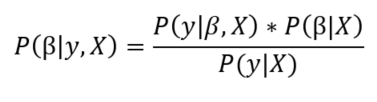

Here, P(β|y, X) is the posterior probability distribution of the model parameters given the inputs and outputs. This is equal to the likelihood of the data, P(y|β, X), multiplied by the prior probability of the parameters and divided by a normalization constant. This is a simple expression of Bayes Theorem, the fundamental underpinning of Bayesian Inference:

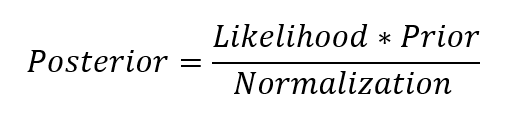

Let’s take a moment to think about why we would we even want to use Bayesian techniques in the first place. Well, there are a couple of advantages in doing so and these are particularly attractive for time series analysis. One issue when working with time series models is over-fitting particularly when estimating models with large numbers of parameters over relatively short time periods. This is not such a problem in this particular case but certainly can be when looking at multiple variables which is quite common in economic forecasting. One solution to the over-fitting problem, is to take a Bayesian approach which allows us to impose certain priors on our variables.

Generally, we can write a Bayesian structural model like this:

Yt=μt+xtβ+St+et,et∼N(0,σ2e)<br>
μt+1=μt+νt,νt∼N(0,σ2ν)


<br>Here xt

denotes a set of regressors, St represents seasonality, and μt is the local level term. The local level term defines how the latent state evolves over time and is often referred to as the unobserved trend. This could, for example, represent an underlying growth in the brand value of a company or external factors that are hard to pinpoint, but it can also soak up short term fluctuations that should be controlled for with explicit terms. Note that the regressor coefficients, seasonality and trend are estimated simultaneously, which helps avoid strange coefficient estimates due to spurious relationships (similar in spirit to Granger causality, see 1). In addition, due to the Bayesian nature of the model, we can shrink the elements of β to promote sparsity or specify outside priors for the means in case we’re not able to get meaningful estimates from the historical data 

In [3]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pydlm.plot.dlmPlot as dlmPlot
from pydlm import dlm, trend, seasonality

In [4]:
data_file = pd.read_csv(r'./dataset/dataset/Bayesian_data.csv')

In [5]:
# Unemployment rate dataset for US multiple location and multiple job profiles
data_file.head()

,iclaimsNSA,michigan.unemployment,idaho.unemployment,pennsylvania.unemployment,unemployment.filing,new.jersey.unemployment,department.of.unemployment,illinois.unemployment,rhode.island.unemployment,unemployment.office,filing.unemployment
0,2.536,1.488,-0.561,1.773,0.909,2.021,1.640,0.300,1.750,0.498,0.073
1,0.882,1.100,-0.992,0.900,0.148,1.280,1.014,0.180,-0.011,0.264,0.584
2,-0.077,1.155,-1.212,1.477,0.210,1.080,1.009,0.119,-0.028,0.031,0.448
3,0.135,0.530,-1.034,1.244,-0.308,1.067,0.734,0.727,-0.230,-0.143,-0.269
4,0.373,0.698,-1.195,0.643,0.570,1.125,0.502,0.598,0.625,-0.219,-1.006


In [6]:
# data and feature extration 
data_file = open('dataset\dataset\Bayesian_data.csv', 'r')

variables = data_file.readline().strip().split(',')
data_map = {}

for var in variables:
    data_map[var] = []

for line in data_file:
    for i, data_piece in enumerate(line.strip().split(',')):
        data_map[variables[i]].append(float(data_piece))

In [7]:
# Extract and store the data.
time_series = data_map[variables[0]]
features = [[data_map[variables[j]][i] for j in range(1, len(variables)) ]
            for i in range(len(time_series))]

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Bayesian-Network" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Bayesian Time Series

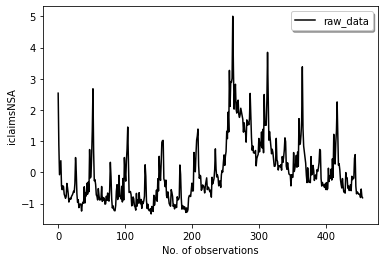

In [11]:
# Plot the raw data
dlmPlot.plotData(range(len(time_series)),
                 time_series,
                 showDataPoint=False,
                 label='raw_data')
plt.legend(loc='best', shadow=True)
plt.xlabel("No. of observations")
plt.ylabel("iclaimsNSA")
plt.show()

In [15]:
seasonal52

In [13]:
# A linear trend
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)
# A seasonality
seasonal52 = seasonality(period=52, discount=0.99, name='seasonal52', w=10)
# Build a simple dlm
simple_dlm = dlm(time_series) + linear_trend + seasonal52

**The default colors for the plots are:**

>> The Y-axis shows the data for iclaimsNSA and X-axis shows the number of observations.

* original data: ‘black’
* filtered results: ‘blue’
* one-step ahead prediction: ‘green’
* smoothed results: ‘red’

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\Users\mohitkumar\Anaconda3\envs\lets_code\lib\site-packages\pydlm\plot\dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


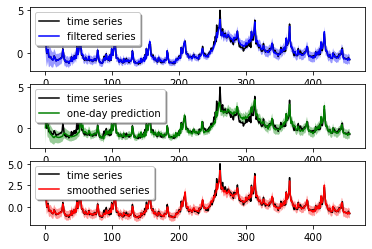

In [16]:
# Fit the model
simple_dlm.fit()
# Plot the fitted results
simple_dlm.turnOff('data points')
simple_dlm.plot()

In [54]:
simple_dlm.getMSE()

0.1730241490628275

C:\Users\mohitkumar\Anaconda3\lib\site-packages\pydlm\plot\dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


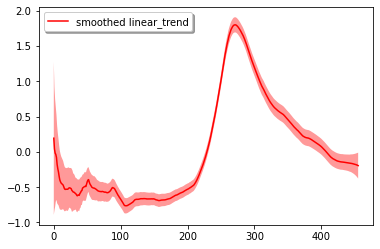

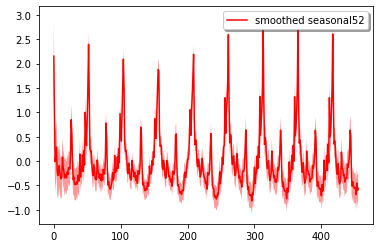

In [55]:
# Plot each component (attribute the time series to each component)
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal52')

Most of the time series shape is attributed to the local linear trend and the strong seasonality pattern is easily seen. To further verify the performance, we use this simple model for long-term forecasting. In particular, we use the previous **351 week's**data to forecast the next **200 weeks** and the previous **251 week's** data to forecast the next **200 weeks**. We lay the predicted results on top of the real data

In [56]:
# predictMean gives the means of all the predicted values 
# predictVar gives the variance of all the predicted values 
(predictMean, predictVar) = simple_dlm.predictN(N = 200, date = 350)
len(predictMean)

200

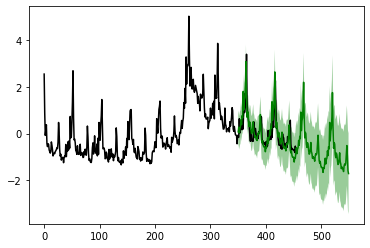

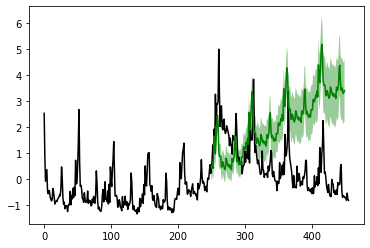

In [57]:
# Plot the prediction give the first 351 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(date=350, N=200)
# Plot the prediction give the first 251 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(date=250, N=200)

From the figure we see that after the crisis peak around 2008 - 2009 (Week 280), the simple model can accurately forecast the next 200 weeks (left figure) given the first 351 weeks. However, the model fails to capture the change near the peak if the forecasting start before Week 280 (right figure).

**Dynamic linear regression**
<br>Now, for bulding more sophiscated model with extra variables in the data file. The extra variables are stored in the variable `features` in the actual code. To build the dynamic linear regression model, we simply add a new component dynamic is the component for modeling dynamically changing predictors, which accepts features as its argument.

In [58]:
# Build a dynamic regression model
from pydlm import dynamic
regressor10 = dynamic(features=features, discount=1.0, name='regressor10', w=10)
drm = dlm(time_series) + linear_trend + seasonal52 + regressor10
drm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\Users\mohitkumar\Anaconda3\lib\site-packages\pydlm\plot\dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


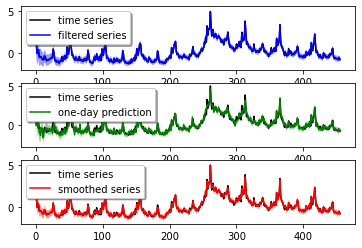

In [59]:
# Plot the fitted results
drm.turnOff('data points')
drm.plot()

C:\Users\mohitkumar\Anaconda3\lib\site-packages\pydlm\plot\dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


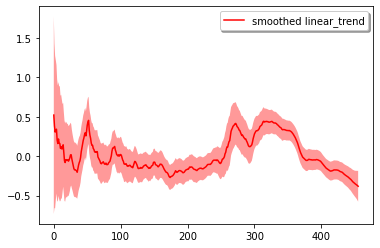

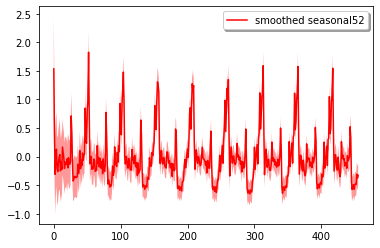

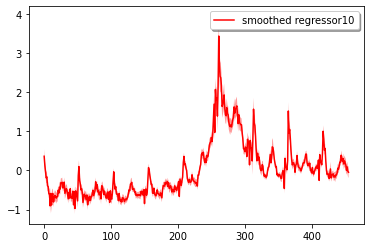

In [60]:
# Plot each component (attribution)
drm.turnOff('predict plot')
drm.turnOff('filtered plot')
drm.plot('linear_trend')
drm.plot('seasonal52')
drm.plot('regressor10')

In [61]:
# predictMean gives the means of all the predicted values 
# predictVar gives the variance of all the predicted values 
drm.predictN(date = 250, N = 105)

([0.6011708678776531,
  0.7326529240557496,
  1.1878974527521469,
  1.7086789538146478,
  1.924568285711955,
  2.520247235170519,
  2.076512144108852,
  2.5606109446528893,
  2.546174412852885,
  3.106923072976006,
  4.150032585874724,
  2.4314898134643013,
  2.0941215348140627,
  2.042767715693315,
  1.933603128890958,
  1.16784760337004,
  1.3431826819176103,
  1.4769171282635432,
  1.6163157267870316,
  1.2496676647244243,
  1.0665351633439526,
  1.0365503329561456,
  1.4994875100130458,
  1.3627056866830196,
  1.2188733127955147,
  1.0175268128162647,
  1.0529996515250943,
  1.012183581388268,
  0.9635447987623758,
  0.9901146275814694,
  0.8509881578899738,
  1.3091507507245728,
  1.1678808199038828,
  1.3769006689037393,
  1.1979743791085329,
  1.8805509894545946,
  2.031169875603436,
  1.388223214459362,
  0.9018779992823451,
  0.7619145602397543,
  0.9711665777767172,
  0.6775459791151578,
  0.7286322524602071,
  0.723169948159875,
  0.5718941573480005,
  0.7073348807411128,
  

This time, the shape of the time series is mostly attributed to the regressor and the linear trend looks more linear. If we do long-term forecasting again, i.e., use the previous 301 week's data to forecast the next 150 weeks and the previous 251 week's data to forecast the next 200 weeks

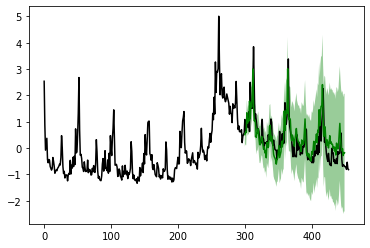

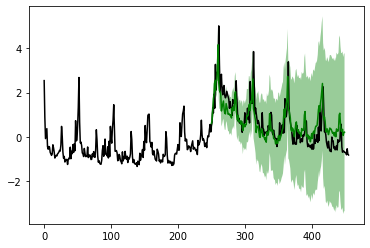

In [62]:
# Plot the prediction give the first 300 weeks and forcast the next 150 weeks.
drm.plotPredictN(N=150, date=300)
# Plot the prediction give the first 250 weeks and forcast the next 200 weeks.
drm.plotPredictN(N=200, date=250)

The results look much better compared to the simple model

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Bayesian-Network" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Bayesian Belief Network

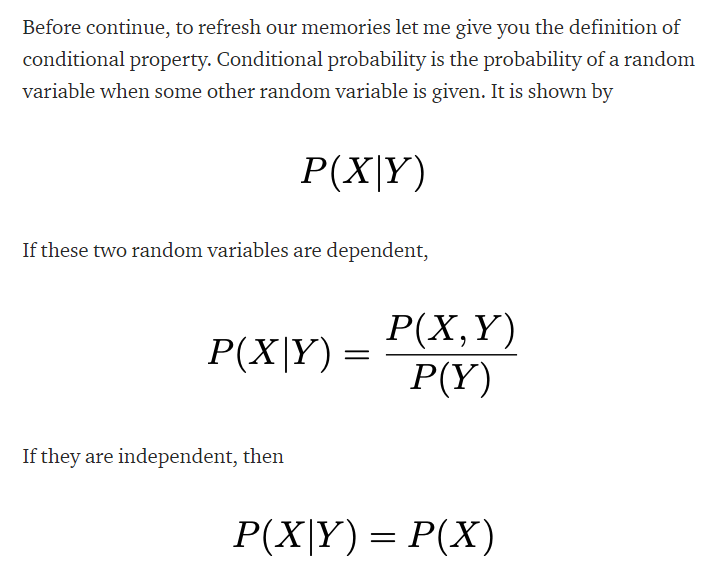

#### Mathematical Definition of Belief Networks

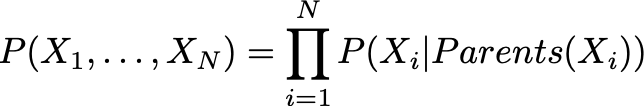

## Implementing using evidence and inference model

In [2]:
#Importing the libraries
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [3]:
# create the nodes
# The data provides conditional probabilties of independent events
season = BbnNode(Variable(0, 'season', ['winter', 'summer']), [0.5, 0.5])
atmos_pres = BbnNode(Variable(1, 'atmos_press', ['high', 'low']), [0.5, 0.5])
allergies = BbnNode(Variable(2, 'allergies', ['allergic', 'non_alergic']), [0.7, 0.3, 0.2, 0.8])
rain = BbnNode(Variable(3, 'rain', ['rainy', 'sunny']), [0.9, 0.1, 0.7, 0.3, 0.3, 0.7, 0.1, 0.9])
grass = BbnNode(Variable(4, 'grass', ['grass', 'no_grass']), [0.8, 0.2, 0.3, 0.7])
umbrellas = BbnNode(Variable(5, 'umbrellas', ['on', 'off']), [0.99, 0.01, 0.80, 0.20, 0.20, 0.80, 0.01, 0.99])
dog_bark = BbnNode(Variable(6, 'dog_bark', ['bark', 'not_bark']), [0.8, 0.2, 0.1, 0.9])
cat_mood = BbnNode(Variable(7, 'cat_mood', ['good', 'bad']), [0.05, 0.95, 0.95, 0.05])
cat_hide = BbnNode(Variable(8, 'cat_hide', ['hide', 'show']), [0.20, 0.80, 0.95, 0.05, 0.95, 0.05, 0.70, 0.30])

In [4]:
#buildind model architechture with dependencies
bbn = Bbn() \
    .add_node(season) \
    .add_node(atmos_pres) \
    .add_node(allergies) \
    .add_node(rain) \
    .add_node(grass) \
    .add_node(umbrellas) \
    .add_node(dog_bark) \
    .add_node(cat_mood) \
    .add_node(cat_hide) \
    .add_edge(Edge(season, allergies, EdgeType.DIRECTED)) \
    .add_edge(Edge(season, umbrellas, EdgeType.DIRECTED)) \
    .add_edge(Edge(season, rain, EdgeType.DIRECTED)) \
    .add_edge(Edge(atmos_pres, rain, EdgeType.DIRECTED)) \
    .add_edge(Edge(rain, grass, EdgeType.DIRECTED)) \
    .add_edge(Edge(rain, umbrellas, EdgeType.DIRECTED)) \
    .add_edge(Edge(rain, dog_bark, EdgeType.DIRECTED)) \
    .add_edge(Edge(rain, cat_mood, EdgeType.DIRECTED)) \
    .add_edge(Edge(dog_bark, cat_hide, EdgeType.DIRECTED)) \
    .add_edge(Edge(cat_mood, cat_hide, EdgeType.DIRECTED))

### Bayesian Network Architecture

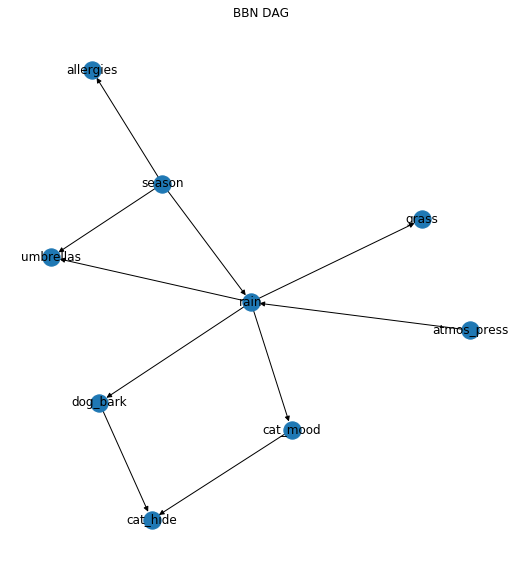

The below code snippet basically give evidence to the network which is the season is winter with 1.0 probability. According to this evidence, when we do the inference, we get following results.

In [14]:
# convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)
# insert an observation evidence
ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('season')) \
    .with_evidence('winter', 1.0) \
    .build()
join_tree.set_observation(ev)
# print the marginal probabilities
for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('--------------------->')

0|season|winter,summer
0=winter|1.00000
0=summer|0.00000
--------------------->
2|allergies|allergic,non_alergic
2=allergic|0.70000
2=non_alergic|0.30000
--------------------->
3|rain|rainy,sunny
3=rainy|0.80000
3=sunny|0.20000
--------------------->
4|grass|grass,no_grass
4=grass|0.70000
4=no_grass|0.30000
--------------------->
1|atmos_press|high,low
1=high|0.50000
1=low|0.50000
--------------------->
5|umbrellas|on,off
5=on|0.95200
5=off|0.04800
--------------------->
6|dog_bark|bark,not_bark
6=bark|0.66000
6=not_bark|0.34000
--------------------->
7|cat_mood|good,bad
7=good|0.23000
7=bad|0.77000
--------------------->
8|cat_hide|hide,show
8=hide|0.87150
8=show|0.12850
--------------------->


When we add further evidence, like the dog is not barking

In [64]:
# convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)
# insert an observation evidence
ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('season')) \
    .with_evidence('winter', 1.0) \
    .build()
ev2 = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('dog_bark')) \
    .with_evidence('not_bark', 0.2) \
    .build()
join_tree.set_observation(ev)
join_tree.set_observation(ev2)
# print the marginal probabilities
for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('--------------------->')

0|season|winter,summer
0=winter|1.00000
0=summer|0.00000
--------------------->
2|allergies|allergic,non_alergic
2=allergic|0.70000
2=non_alergic|0.30000
--------------------->
3|rain|rainy,sunny
3=rainy|0.47059
3=sunny|0.52941
--------------------->
4|grass|grass,no_grass
4=grass|0.53529
4=no_grass|0.46471
--------------------->
1|atmos_press|high,low
1=high|0.39706
1=low|0.60294
--------------------->
5|umbrellas|on,off
5=on|0.88941
5=off|0.11059
--------------------->
6|dog_bark|bark,not_bark
6=bark|0.00000
6=not_bark|1.00000
--------------------->
7|cat_mood|good,bad
7=good|0.52647
7=bad|0.47353
--------------------->
8|cat_hide|hide,show
8=hide|0.83162
8=show|0.16838
--------------------->


##### Lots of probability values changed when we add the evidence related to the barking

## Implementing using Probability model by Monty hall problem

In [37]:
#Import required packages
import math
from pomegranate import *
 
# Initially the door selected by the guest is completely random
guest =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 
# The door containing the prize is also a random process
prize =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )

Let’s take a look at initializing a Bayesian network in the first manner by quickly implementing the Monty Hall problem. 

In [ ]:
#childnode = ConditionalProbabilityTable.from_samples(data, [parentnode],weights=None, pseudocount=0.0)
# The door Monty picks, depends on the choice of the guest and the prize door
monty = ConditionalProbabilityTable(
[[ 'A', 'A', 'A', 0.0 ],
[ 'A', 'A', 'B', 0.5 ],
[ 'A', 'A', 'C', 0.5 ],
[ 'A', 'B', 'A', 0.0 ],
[ 'A', 'B', 'B', 0.0 ],
[ 'A', 'B', 'C', 1.0 ],
[ 'A', 'C', 'A', 0.0 ],
[ 'A', 'C', 'B', 1.0 ],
[ 'A', 'C', 'C', 0.0 ],
[ 'B', 'A', 'A', 0.0 ],
[ 'B', 'A', 'B', 0.0 ],
[ 'B', 'A', 'C', 1.0 ],
[ 'B', 'B', 'A', 0.5 ],
[ 'B', 'B', 'B', 0.0 ],
[ 'B', 'B', 'C', 0.5 ],
[ 'B', 'C', 'A', 1.0 ],
[ 'B', 'C', 'B', 0.0 ],
[ 'B', 'C', 'C', 0.0 ],
[ 'C', 'A', 'A', 0.0 ],
[ 'C', 'A', 'B', 1.0 ],
[ 'C', 'A', 'C', 0.0 ],
[ 'C', 'B', 'A', 1.0 ],
[ 'C', 'B', 'B', 0.0 ],
[ 'C', 'B', 'C', 0.0 ],
[ 'C', 'C', 'A', 0.5 ],
[ 'C', 'C', 'B', 0.5 ],
[ 'C', 'C', 'C', 0.0 ]], [guest, prize] 

In [ ]:
#adding states to the base
d1 = State( guest, name="guest" )
d2 = State( prize, name="prize" )
d3 = State( monty, name="monty" )

In [ ]:
#Building the Bayesian Network
network = BayesianNetwork( "Solving the Monty Hall Problem With Bayesian Networks" )
network.add_states(d1, d2, d3)
network.add_edge(d1, d3)
network.add_edge(d2, d3)
network.bake()

Let’s understand the dependencies here, the door selected by the guest and the door containing the car are completely random processes. However, the door Monty chooses to open is dependent on both the doors; the door selected by the guest, and the door the prize is behind. Monty has to choose in such a way that the door does not contain the prize and it cannot be the one chosen by the guest.

In [38]:
beliefs = network.predict_proba({ 'guest' : 'A' })
beliefs = map(str, beliefs)
print("n".join( "{}t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) ))

guesttAnprizet{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.2000000000000002,
            "B" :0.2000000000000002,
            "C" :0.5999999999999996
        }
    ],
    "frozen" :false
}nmontyt{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "C" :0.30000000000000016,
            "B" :0.6999999999999997,
            "A" :0.0
        }
    ],
    "frozen" :false
}


In the above code snippet, we’ve assumed that the guest picks door ‘A’. Given this information, the probability of the prize door being ‘A’, ‘B’, ‘C’ is equal (1/3) since it is a random process. However, the probability of Monty picking ‘A’ is obviously zero since the guest picked door ‘A’. And the other two doors have a 50% chance of being picked by Monty since we don’t know which is the prize door.

In [39]:
beliefs = network.predict_proba({'guest' : 'A', 'monty' : 'B'})
print("n".join( "{}t{}".format( state.name, str(belief) ) for state, belief in zip( network.states, beliefs )))

guesttAnprizet{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.14285714285714315,
            "B" :0.0,
            "C" :0.8571428571428568
        }
    ],
    "frozen" :false
}nmontytB


In the above code snippet, we’ve provided two inputs to our Bayesian Network, this is where things get interesting. We’ve mentioned the following:

The guest picks door ‘A’
Monty picks door ‘B’
Notice the output, the probability of the car being behind door ‘C’ is approx. 66%. This proves that if the guest switches his choice, he has a higher probability of winning. Though this might seem confusing to some of you, it’s a known fact that:

Guests who decided to switch doors won about 2/3 of the time
Guests who refused to switch won about 1/3 of the time

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Bayesian-Network" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>